rRNA mean: 45.2143115942029, rRNA std: 30.02383770572296

Biotype: rRNA
Number of reads: 11040
Mean z-score: 0.00
Median z-score: -0.21
Proportion of reads exceeding z-score of 2.33: 2.89%

Biotype: snRNA
Number of reads: 145540
Mean z-score: -0.62
Median z-score: -0.81
Proportion of reads exceeding z-score of 2.33: 0.92%

Biotype: protein_coding
Number of reads: 1166725
Mean z-score: 0.60
Median z-score: 0.09
Proportion of reads exceeding z-score of 2.33: 12.21%

Biotype: snoRNA
Number of reads: 81652
Mean z-score: -0.44
Median z-score: -0.67
Proportion of reads exceeding z-score of 2.33: 1.51%


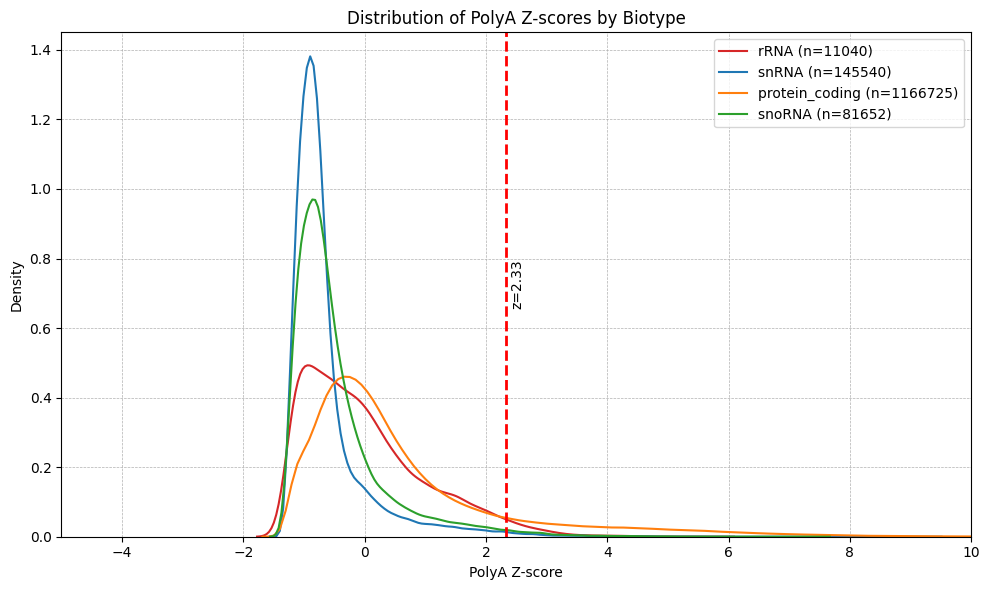


Analysis complete.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Read the file
df = pd.read_csv('/scratch/lf10/as7425/R1/test/outputs/new2/output_table.tsv', sep='\t')

# Create null distribution from rRNA polyA lengths
rRNA_lengths = df[df['biotype'] == 'rRNA']['polya_length'].dropna()
rRNA_mean = rRNA_lengths.mean()
rRNA_std = rRNA_lengths.std()
print(f"rRNA mean: {rRNA_mean}, rRNA std: {rRNA_std}")

if len(rRNA_lengths) == 0:
    print("No rRNA reads found. Using default distribution (mean=0, std=1)")
    rRNA_mean, rRNA_std = 0, 1

# Function to calculate z-score
def calculate_zscore(x):
    return (x - rRNA_mean) / rRNA_std

# Assign z-score to all reads, including rRNA
df['polya_zscore'] = df['polya_length'].apply(calculate_zscore)

# Specify the biotypes we want to plot
selected_biotypes = ['rRNA', 'snRNA', 'protein_coding', 'snoRNA']

# Set up the plot
plt.figure(figsize=(10, 6))

# Color palette for the biotypes
colors = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c']  # Red, Blue, Orange, Green

for i, biotype in enumerate(selected_biotypes):
    biotype_data = df[df['biotype'] == biotype]['polya_zscore'].dropna()
    
    if len(biotype_data) > 0:
        # Plot smoothed density
        sns.kdeplot(biotype_data, label=f'{biotype} (n={len(biotype_data)})', color=colors[i])
        
        # Calculate proportion exceeding z-score of 2.33 (99th percentile of standard normal)
        prop_exceeding = (biotype_data > 2.33).mean()
        
        print(f"\nBiotype: {biotype}")
        print(f"Number of reads: {len(biotype_data)}")
        print(f"Mean z-score: {biotype_data.mean():.2f}")
        print(f"Median z-score: {biotype_data.median():.2f}")
        print(f"Proportion of reads exceeding z-score of 2.33: {prop_exceeding:.2%}")

# Plot settings
plt.xlabel('PolyA Z-score')
plt.ylabel('Density')
plt.title('Distribution of PolyA Z-scores by Biotype')
plt.legend(loc='upper right')
plt.axvline(2.33, color='r', linestyle='dashed', linewidth=2, label='99th percentile (z=2.33)')
plt.text(2.4, plt.gca().get_ylim()[1]/2, 'z=2.33', rotation=90, verticalalignment='center')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(-5, 10)  # Adjust this range as needed based on your data
plt.tight_layout()
plt.show()

print("\nAnalysis complete.")

Extracting pt:i: values from BAM file...
Found 938 pt:i: tags. Plotting distribution...


/jobfs/124500891.gadi-pbs/ipykernel_3592931/519009401.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pt_values, shade=True)


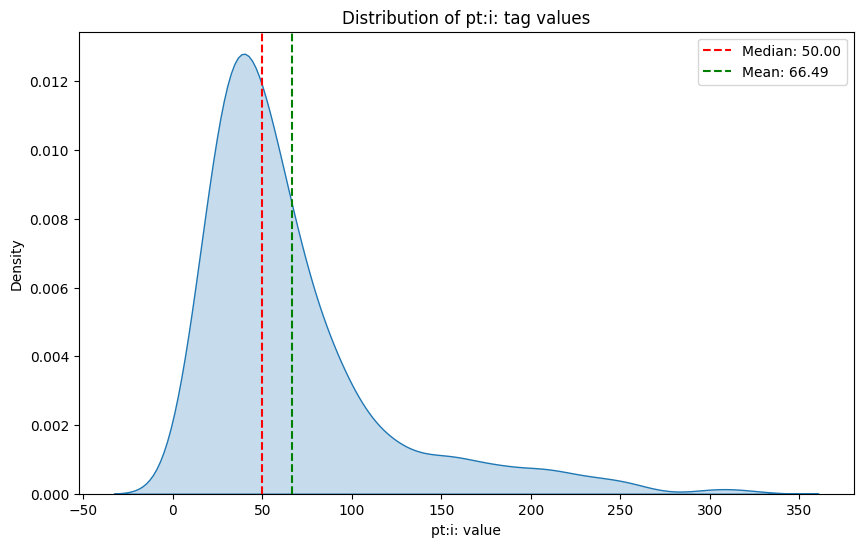

In [2]:
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import argparse

def extract_pt_values(bam_path):
    pt_values = []
    with pysam.AlignmentFile(bam_path, "rb") as bam_file:
        for read in bam_file:
            if read.has_tag('pt'):
                pt_value = read.get_tag('pt')
                pt_values.append(pt_value)
    return pt_values

def plot_pt_distribution(pt_values):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(pt_values, shade=True)
    plt.title('Distribution of pt:i: tag values')
    plt.xlabel('pt:i: value')
    plt.ylabel('Density')
    
    # Add some summary statistics to the plot
    median_pt = np.median(pt_values)
    mean_pt = np.mean(pt_values)
    plt.axvline(median_pt, color='r', linestyle='--', label=f'Median: {median_pt:.2f}')
    plt.axvline(mean_pt, color='g', linestyle='--', label=f'Mean: {mean_pt:.2f}')
    
    plt.legend()
    plt.show()
    

def main():

    bam_path="/scratch/lf10/as7425/R1/test/outputs/new2/ASR023_HeLa_DMSO_POINT_rep1_primary_genome.bam_myc.bam"

    print("Extracting pt:i: values from BAM file...")
    pt_values = extract_pt_values(bam_path)
    
    if not pt_values:
        print("No pt:i: tags found in the BAM file.")
        return

    print(f"Found {len(pt_values)} pt:i: tags. Plotting distribution...")
    plot_pt_distribution(pt_values)


if __name__ == "__main__":
    main()

Extracting pt:i: values from BAM file...
Found 2236 pt:i: tags. Plotting distribution...


/jobfs/124500891.gadi-pbs/ipykernel_3592931/1862411997.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pt_values, shade=True)


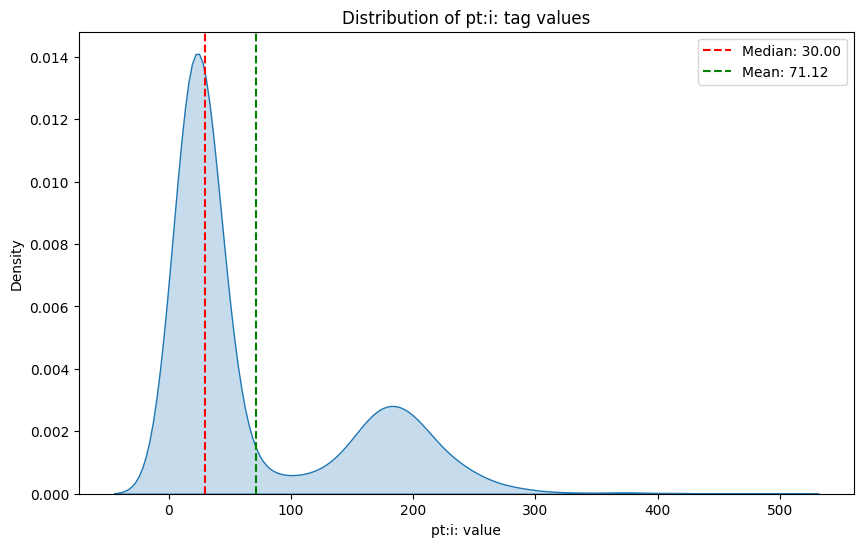

In [3]:
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import argparse

def extract_pt_values(bam_path):
    pt_values = []
    with pysam.AlignmentFile(bam_path, "rb") as bam_file:
        for read in bam_file:
            if read.has_tag('pt'):
                pt_value = read.get_tag('pt')
                pt_values.append(pt_value)
    return pt_values

def plot_pt_distribution(pt_values):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(pt_values, shade=True)
    plt.title('Distribution of pt:i: tag values')
    plt.xlabel('pt:i: value')
    plt.ylabel('Density')
    
    # Add some summary statistics to the plot
    median_pt = np.median(pt_values)
    mean_pt = np.mean(pt_values)
    plt.axvline(median_pt, color='r', linestyle='--', label=f'Median: {median_pt:.2f}')
    plt.axvline(mean_pt, color='g', linestyle='--', label=f'Mean: {mean_pt:.2f}')
    
    plt.legend()
    plt.show()
    

def main():

    bam_path="/scratch/lf10/as7425/ASR014_myc.bam"

    print("Extracting pt:i: values from BAM file...")
    pt_values = extract_pt_values(bam_path)
    
    if not pt_values:
        print("No pt:i: tags found in the BAM file.")
        return

    print(f"Found {len(pt_values)} pt:i: tags. Plotting distribution...")
    plot_pt_distribution(pt_values)


if __name__ == "__main__":
    main()

Processing BAM files in folder: /g/data/lf10/as7425/2023_mrna-biogenesis-maps/analysis/2024-09-01_HeLa_WT_first6/myc
Extracting pt:i: values from ASR014-HeLa-POINT-4x-rep3_primary_genome.bam...
Extracting pt:i: values from ASR026_HeLa_POINT_rep7_primary_genome.bam...
Extracting pt:i: values from ASR024_HeLa_POINT_rep5_primary_genome.bam...
Extracting pt:i: values from ASR013_HeLa-POINT-RNA004-rep2_primary_genome.bam...
Extracting pt:i: values from ASR025_HeLa_POINT_rep6_primary_genome.bam...
Extracting pt:i: values from ASR015-HeLa-POINT-4x-rep4_primary_genome.bam...
Extracting pt:i: values from ASR011_HeLa-POINT-RNA004-rep1_primary_genome.bam...
Plotting distribution for each BAM file...


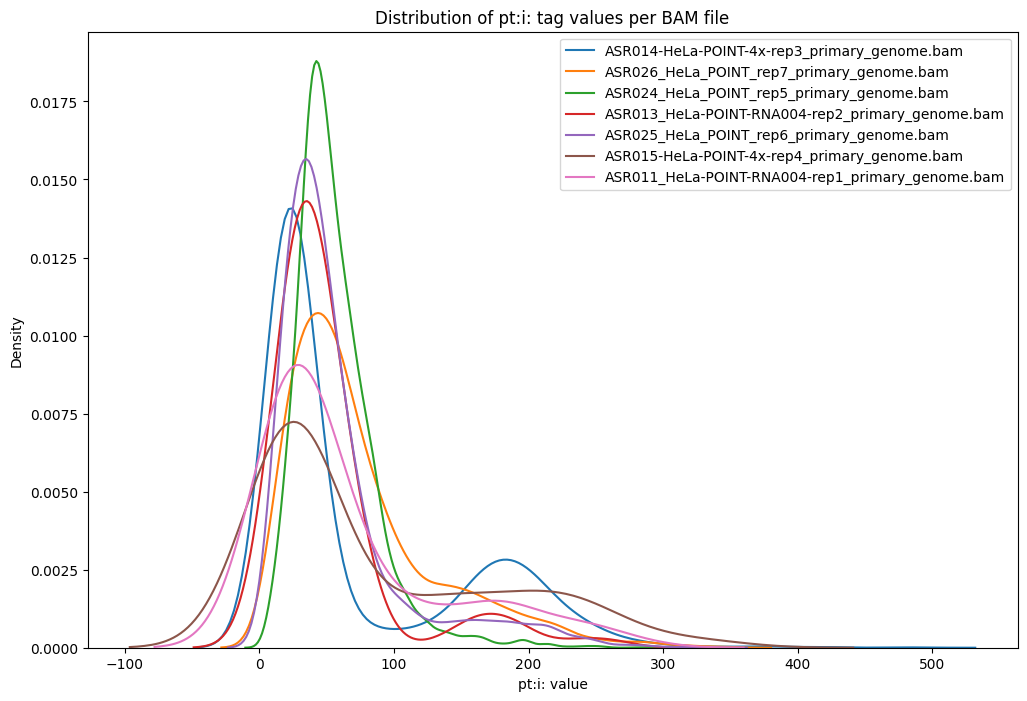

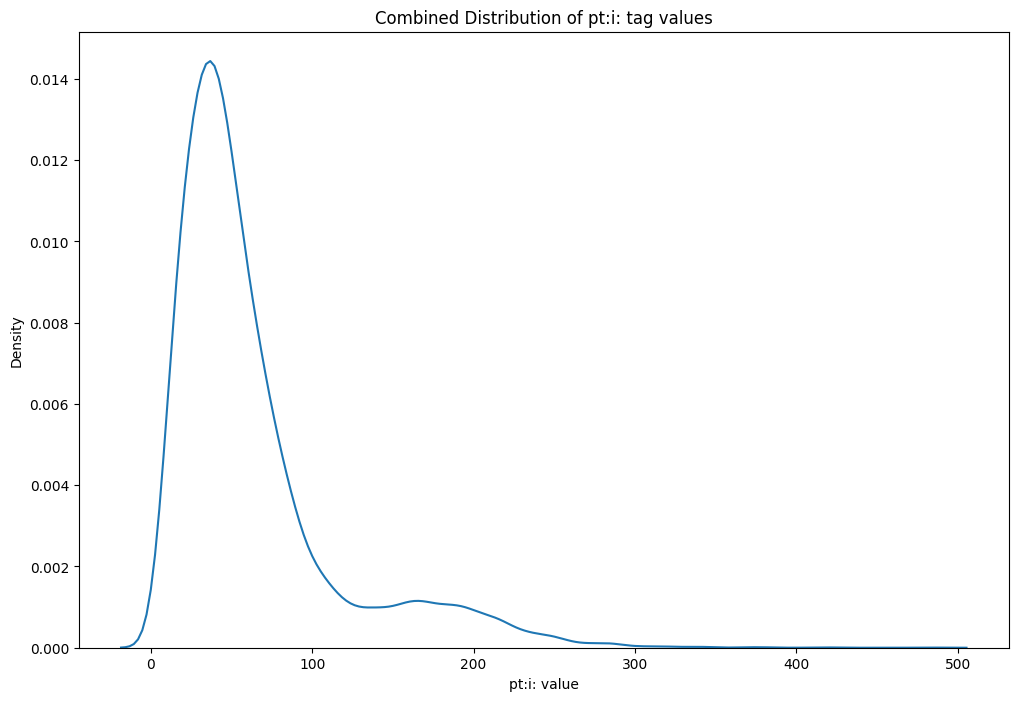

In [4]:
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def extract_pt_values(bam_path):
    pt_values = []
    with pysam.AlignmentFile(bam_path, "rb") as bam_file:
        for read in bam_file:
            if read.has_tag('pt'):
                pt_value = read.get_tag('pt')
                pt_values.append(pt_value)
    return pt_values

def plot_pt_distribution(pt_values_dict, output_path):
    plt.figure(figsize=(12, 8))
    
    # Plot individual distributions for each BAM file
    for bam_file, pt_values in pt_values_dict.items():
        sns.kdeplot(pt_values, fill=False, label=os.path.basename(bam_file))

    plt.title('Distribution of pt:i: tag values per BAM file')
    plt.xlabel('pt:i: value')
    plt.ylabel('Density')
    plt.legend()

    # Save the plot for individual distributions
    plt.savefig(output_path)
    plt.show()

    # Now plot the combined distribution without labels
    all_pt_values = np.concatenate(list(pt_values_dict.values()))

    plt.figure(figsize=(12, 8))
    sns.kdeplot(all_pt_values, fill=False)
    
    plt.title('Combined Distribution of pt:i: tag values')
    plt.xlabel('pt:i: value')
    plt.ylabel('Density')

    # Save the plot for the combined distribution
    combined_output_path = os.path.splitext(output_path)[0] + "_combined.png"
    plt.savefig(combined_output_path)
    plt.show()

# Define the input and output paths
bam_folder = "/g/data/lf10/as7425/2023_mrna-biogenesis-maps/analysis/2024-09-01_HeLa_WT_first6/myc"
output_plot_path = "/g/data/lf10/as7425/2023_mrna-biogenesis-maps/analysis/2024-09-01_HeLa_WT_first6/pt_distribution.png"

# Dictionary to hold pt:i: values for each BAM file
pt_values_dict = {}

print("Processing BAM files in folder:", bam_folder)

for bam_file in os.listdir(bam_folder):
    if bam_file.endswith(".bam"):
        bam_path = os.path.join(bam_folder, bam_file)
        print(f"Extracting pt:i: values from {bam_file}...")
        pt_values = extract_pt_values(bam_path)
        
        if pt_values:
            pt_values_dict[bam_file] = pt_values
        else:
            print(f"No pt:i: tags found in {bam_file}. Skipping...")

if pt_values_dict:
    print("Plotting distribution for each BAM file...")
    plot_pt_distribution(pt_values_dict, output_plot_path)
else:
    print("No pt:i: tags found in any BAM files.")


Processing BAM files in folder: /g/data/lf10/as7425/2023_mrna-biogenesis-maps/analysis/2024-09-01_HeLa_WT_first6/myc
Extracting pt:i: values from ASR014-HeLa-POINT-4x-rep3_primary_genome.bam...
Extracting pt:i: values from ASR026_HeLa_POINT_rep7_primary_genome.bam...
Extracting pt:i: values from ASR024_HeLa_POINT_rep5_primary_genome.bam...
Extracting pt:i: values from ASR013_HeLa-POINT-RNA004-rep2_primary_genome.bam...
Extracting pt:i: values from ASR025_HeLa_POINT_rep6_primary_genome.bam...
Extracting pt:i: values from ASR015-HeLa-POINT-4x-rep4_primary_genome.bam...
Extracting pt:i: values from ASR011_HeLa-POINT-RNA004-rep1_primary_genome.bam...
Plotting distribution for each BAM file...


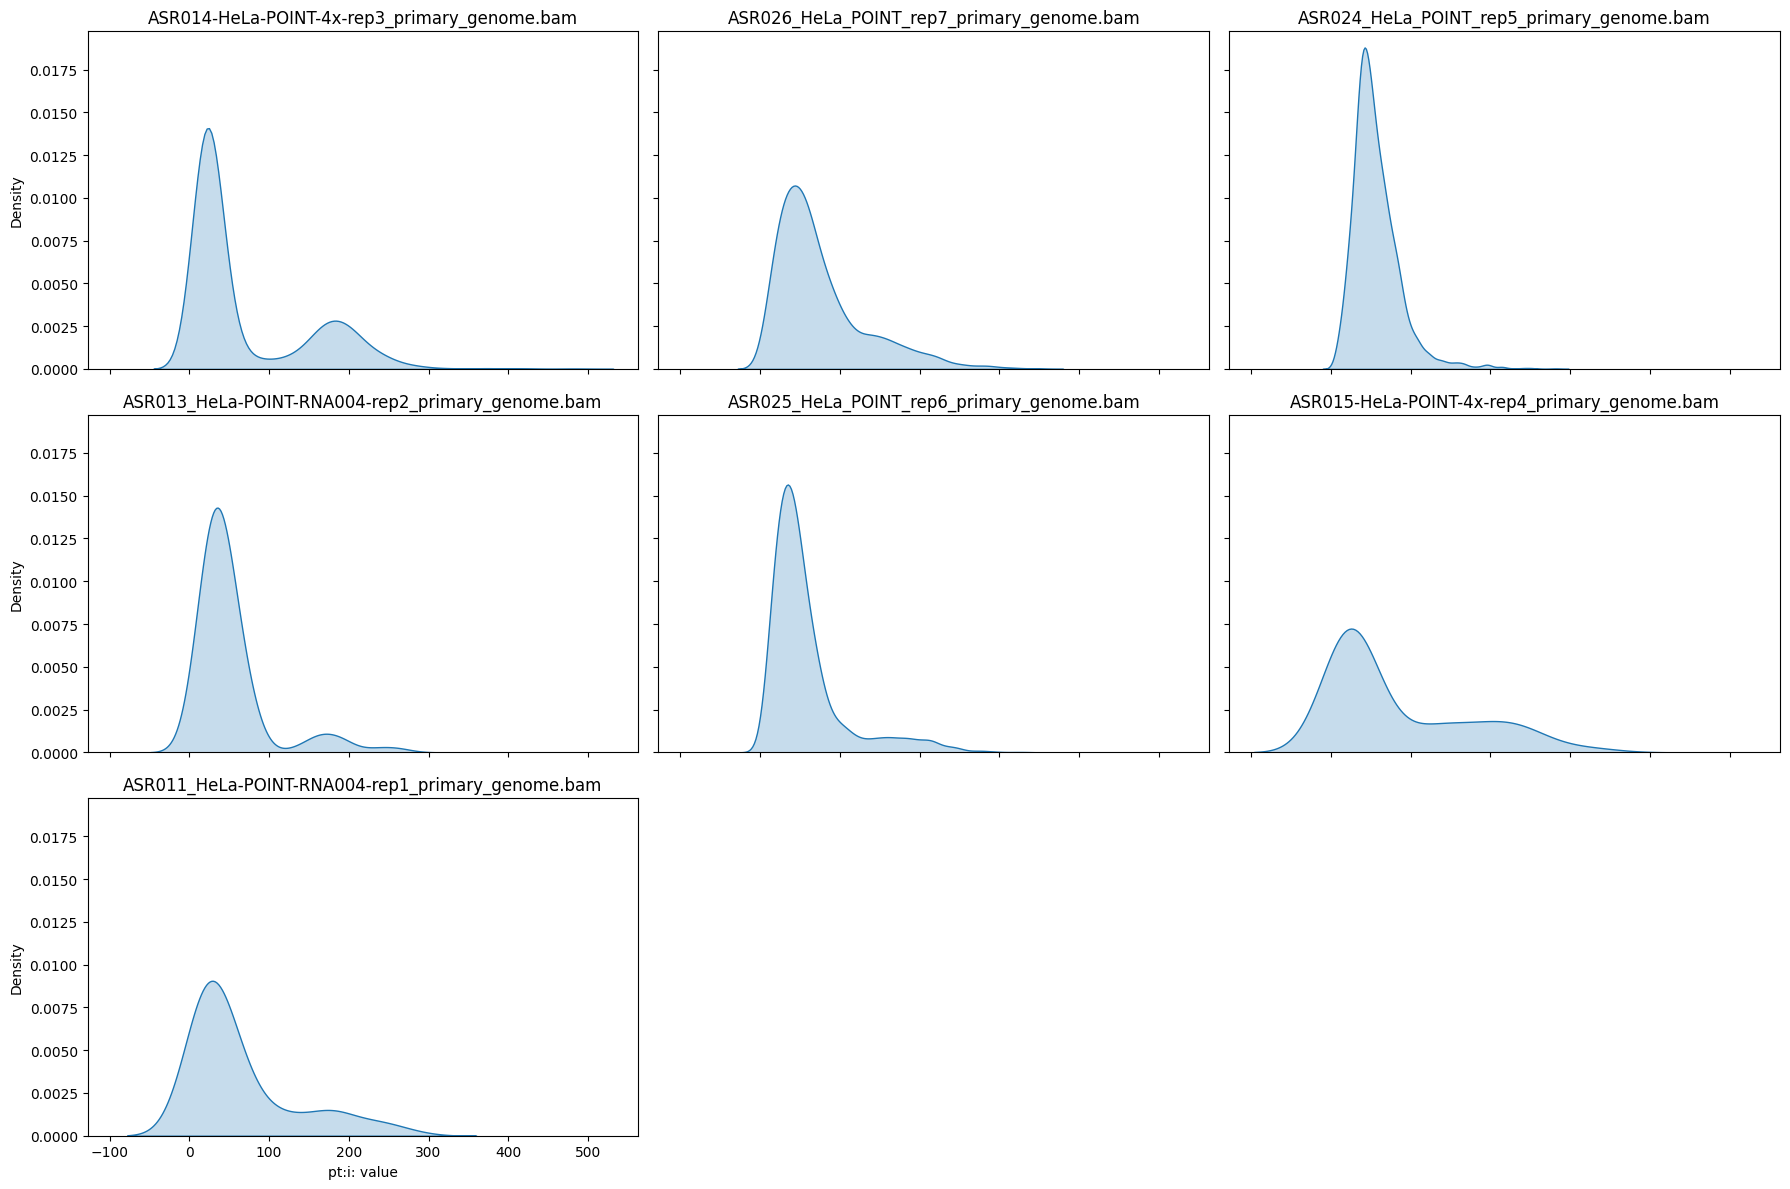

In [5]:
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import math

def extract_pt_values(bam_path):
    pt_values = []
    with pysam.AlignmentFile(bam_path, "rb") as bam_file:
        for read in bam_file:
            if read.has_tag('pt'):
                pt_value = read.get_tag('pt')
                pt_values.append(pt_value)
    return pt_values

def plot_pt_distribution_facet(pt_values_dict, output_path):
    num_files = len(pt_values_dict)
    cols = 3  # Number of columns in the grid
    rows = math.ceil(num_files / cols)  # Number of rows based on the number of BAM files
    
    fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, (bam_file, pt_values) in enumerate(pt_values_dict.items()):
        sns.kdeplot(pt_values, fill=True, ax=axes[i])
        axes[i].set_title(os.path.basename(bam_file))
        axes[i].set_xlabel('pt:i: value')
        axes[i].set_ylabel('Density')

    # Hide any empty subplots if the number of BAM files is less than the grid size
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

# Define the input and output paths
bam_folder = "/g/data/lf10/as7425/2023_mrna-biogenesis-maps/analysis/2024-09-01_HeLa_WT_first6/myc"
output_plot_path = "/g/data/lf10/as7425/2023_mrna-biogenesis-maps/analysis/2024-09-01_HeLa_WT_first6/pt_distribution_facet.png"

# Dictionary to hold pt:i: values for each BAM file
pt_values_dict = {}

print("Processing BAM files in folder:", bam_folder)

for bam_file in os.listdir(bam_folder):
    if bam_file.endswith(".bam"):
        bam_path = os.path.join(bam_folder, bam_file)
        print(f"Extracting pt:i: values from {bam_file}...")
        pt_values = extract_pt_values(bam_path)
        
        if pt_values:
            pt_values_dict[bam_file] = pt_values
        else:
            print(f"No pt:i: tags found in {bam_file}. Skipping...")

if pt_values_dict:
    print("Plotting distribution for each BAM file...")
    plot_pt_distribution_facet(pt_values_dict, output_plot_path)
else:
    print("No pt:i: tags found in any BAM files.")


In [6]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

def fit_gmm_and_classify(pt_values, n_components=2):
    # Reshape data for GMM
    pt_values = np.array(pt_values).reshape(-1, 1)
    
    # Fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(pt_values)
    
    # Predict the component each pt_value belongs to
    labels = gmm.predict(pt_values)
    
    # Separate the values into two components based on the labels
    component_0 = pt_values[labels == 0]
    component_1 = pt_values[labels == 1]
    
    return component_0, component_1, gmm

def plot_separated_distributions(pt_values, component_0, component_1, output_path):
    plt.figure(figsize=(12, 8))
    
    sns.histplot(component_0, color='blue', kde=True, label='Component 0', stat='density')
    sns.histplot(component_1, color='red', kde=True, label='Component 1', stat='density')
    
    plt.title('Separated Distributions of pt:i: tag values')
    plt.xlabel('pt:i: value')
    plt.ylabel('Density')
    plt.legend()
    
    plt.savefig(output_path)
    plt.show()

# Example usage:
# Assuming `pt_values_dict` is already populated as in your previous code



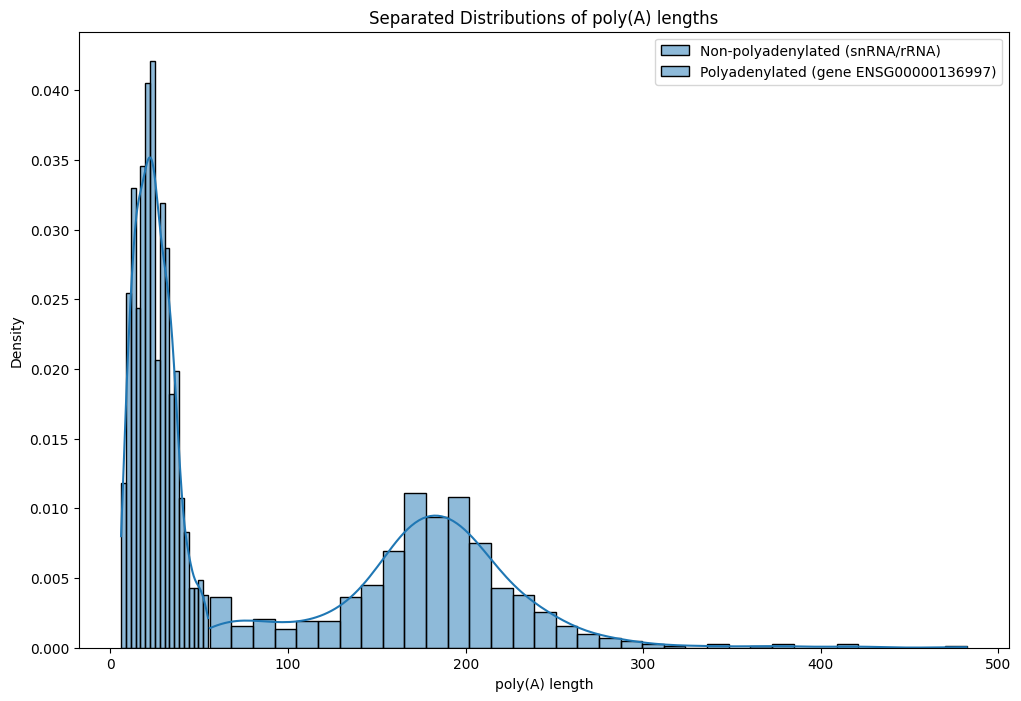

In [7]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read only the columns of interest
file_path = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/ASR014-HeLa-POINT-4x-rep3/ASR014-HeLa-POINT-4x-rep3_ROGUE1_bulk.txt"
columns_of_interest = ['gene_id', 'polya_length', 'biotype']
df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)

# Step 2: Drop rows with any NaN values in the relevant columns
df = df.dropna(subset=columns_of_interest)

# Step 3: Filter data for the first Gaussian (snRNA or rRNA)
null_data = df[(df['biotype'] == 'snRNA') | (df['biotype'] == 'rRNA')]['polya_length']

# Step 4: Filter data for the second Gaussian (gene_id == ENSG00000136997)
gene_data = df[df['gene_id'] == 'ENSG00000136997']['polya_length']

# Step 5: Fit GMM using the null distribution and the gene-specific data
def fit_gmm_with_null(null_values, gene_values, n_components=2):
    # Fit GMM to the null distribution
    null_values = np.array(null_values).reshape(-1, 1)
    null_gmm = GaussianMixture(n_components=1, random_state=0)
    null_gmm.fit(null_values)
    
    # Get the mean and covariance from the null distribution
    null_mean = null_gmm.means_[0][0]
    null_covariance = null_gmm.covariances_[0][0][0]
    
    # Fit GMM to the actual gene values with one component initialized from null distribution
    gene_values = np.array(gene_values).reshape(-1, 1)
    
    gmm = GaussianMixture(n_components=n_components, random_state=0, 
                          means_init=np.array([[null_mean], [np.mean(gene_values)]]), 
                          precisions_init=np.array([[[1 / null_covariance]], [[1 / np.var(gene_values)]]]))

    gmm.fit(gene_values)
    
    # Predict the component each value belongs to
    labels = gmm.predict(gene_values)
    
    # Separate the values into two components based on the labels
    component_0 = gene_values[labels == 0]
    component_1 = gene_values[labels == 1]
    
    return component_0, component_1, gmm

# Step 6: Generate and visualize the plot
component_0, component_1, gmm = fit_gmm_with_null(null_data, gene_data)

# Plotting the separated distributions
plt.figure(figsize=(12, 8))
sns.histplot(component_0, color='blue', kde=True, label='Non-polyadenylated (snRNA/rRNA)', stat='density')
sns.histplot(component_1, color='red', kde=True, label='Polyadenylated (gene ENSG00000136997)', stat='density')

plt.title('Separated Distributions of poly(A) lengths')
plt.xlabel('poly(A) length')
plt.ylabel('Density')
plt.legend()

output_path = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/ASR014-HeLa-POINT-4x-rep3/separated_distributions.png"
plt.savefig(output_path)
plt.show()


# Myc gaussians for first 6 against rRNA/snRNA

/jobfs/124500891.gadi-pbs/ipykernel_3592931/3928375859.py:18: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)


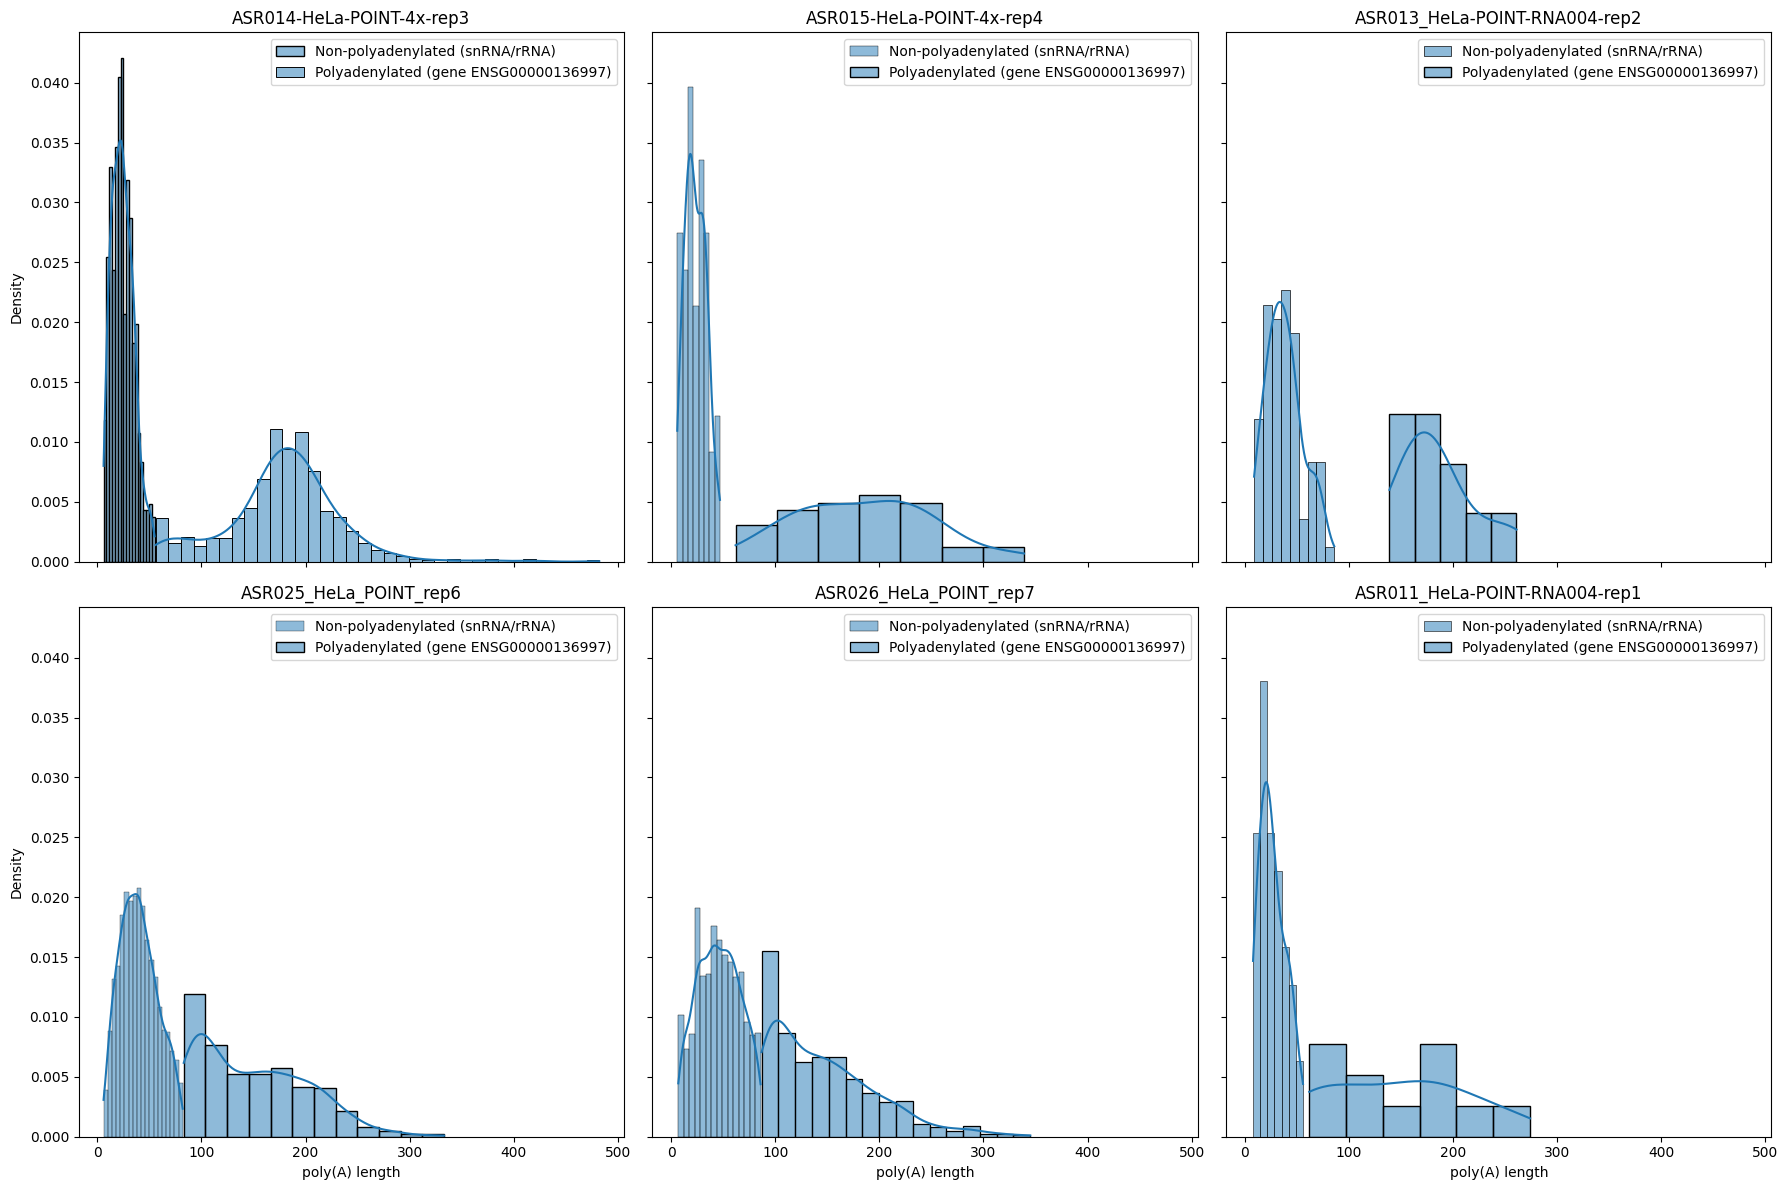

In [8]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Step 1: Define the directory and search for files recursively
base_dir = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/"
file_pattern = "**/*ROGUE1_bulk*.txt"
file_paths = glob.glob(os.path.join(base_dir, file_pattern), recursive=True)

# Step 2: Function to process each file and generate a plot
def process_file(file_path):
    # Read only the columns of interest
    columns_of_interest = ['gene_id', 'polya_length', 'biotype']
    df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)
    
    # Drop rows with any NaN values
    df = df.dropna(subset=columns_of_interest)
    
    # Filter data for the first Gaussian (snRNA or rRNA)
    null_data = df[(df['biotype'] == 'snRNA') | (df['biotype'] == 'rRNA')]['polya_length']
    
    # Filter data for the second Gaussian (gene_id == ENSG00000136997)
    gene_data = df[df['gene_id'] == 'ENSG00000136997']['polya_length']
    
    # Fit GMM using the null distribution and the gene-specific data
    component_0, component_1, gmm = fit_gmm_with_null(null_data, gene_data)
    
    return component_0, component_1, file_path

# Step 3: Fit GMM using the null distribution and the gene-specific data
def fit_gmm_with_null(null_values, gene_values, n_components=2):
    # Fit GMM to the null distribution
    null_values = np.array(null_values).reshape(-1, 1)
    null_gmm = GaussianMixture(n_components=1, random_state=0)
    null_gmm.fit(null_values)
    
    # Get the mean and covariance from the null distribution
    null_mean = null_gmm.means_[0][0]
    null_covariance = null_gmm.covariances_[0][0][0]
    
    # Fit GMM to the actual gene values with one component initialized from null distribution
    gene_values = np.array(gene_values).reshape(-1, 1)
    
    gmm = GaussianMixture(n_components=n_components, random_state=0, 
                          means_init=np.array([[null_mean], [np.mean(gene_values)]]), 
                          precisions_init=np.array([[[1 / null_covariance]], [[1 / np.var(gene_values)]]]))

    gmm.fit(gene_values)
    
    # Predict the component each value belongs to
    labels = gmm.predict(gene_values)
    
    # Separate the values into two components based on the labels
    component_0 = gene_values[labels == 0]
    component_1 = gene_values[labels == 1]
    
    return component_0, component_1, gmm

# Step 4: Plotting
def plot_facet_grid(data, output_path):
    num_files = len(data)
    cols = 3  # Number of columns in the grid
    rows = int(np.ceil(num_files / cols))  # Number of rows based on the number of files
    
    fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, (component_0, component_1, file_path) in enumerate(data):
        sns.histplot(component_0, color='blue', kde=True, label='Non-polyadenylated (snRNA/rRNA)', stat='density', ax=axes[i])
        sns.histplot(component_1, color='red', kde=True, label='Polyadenylated (gene ENSG00000136997)', stat='density', ax=axes[i])
        axes[i].set_title(os.path.basename(file_path).replace('_ROGUE1_bulk.txt', ''))
        axes[i].set_xlabel('poly(A) length')
        axes[i].set_ylabel('Density')
        axes[i].legend(loc='upper right')

    # Hide any empty subplots if the number of files is less than the grid size
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.show()

# Step 5: Process all files and collect the data
processed_data = [process_file(file_path) for file_path in file_paths]

# Step 6: Generate and save the facet grid plot
output_path = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/separated_distributions_facet.png"
plot_facet_grid(processed_data, output_path)


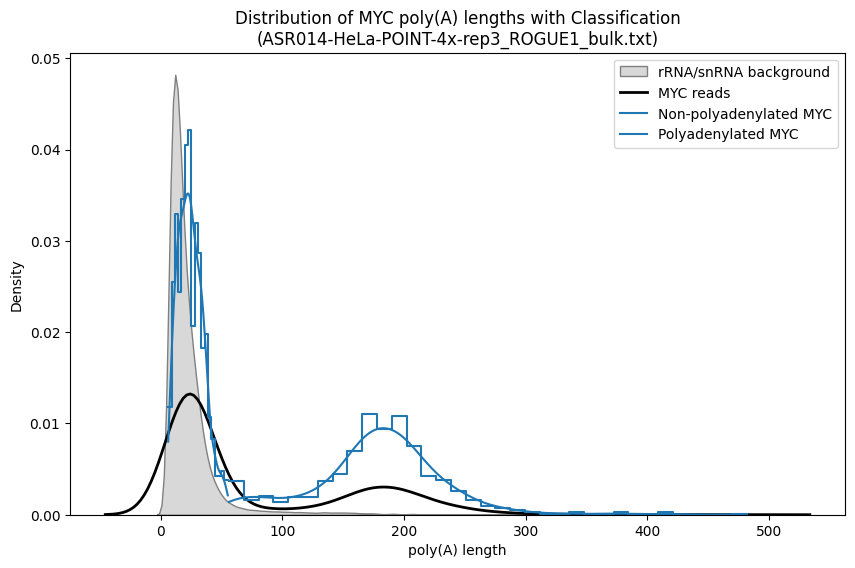

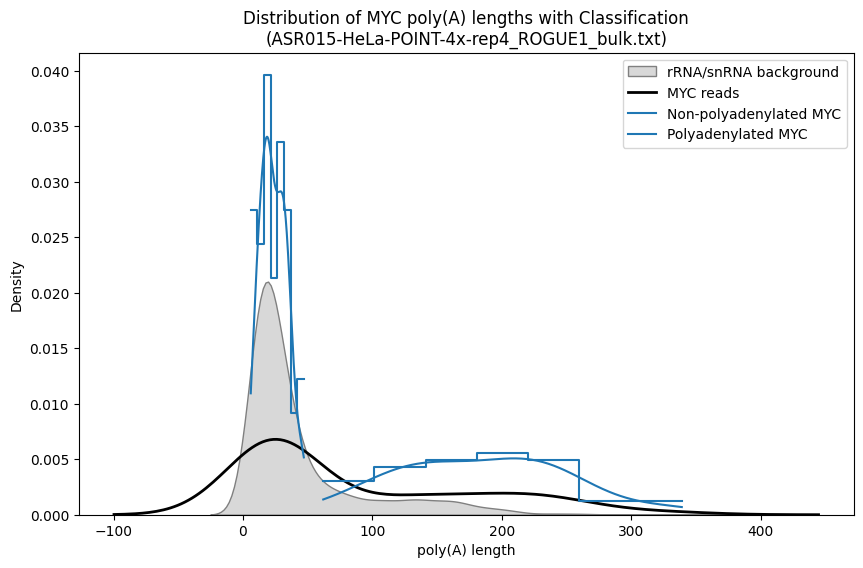

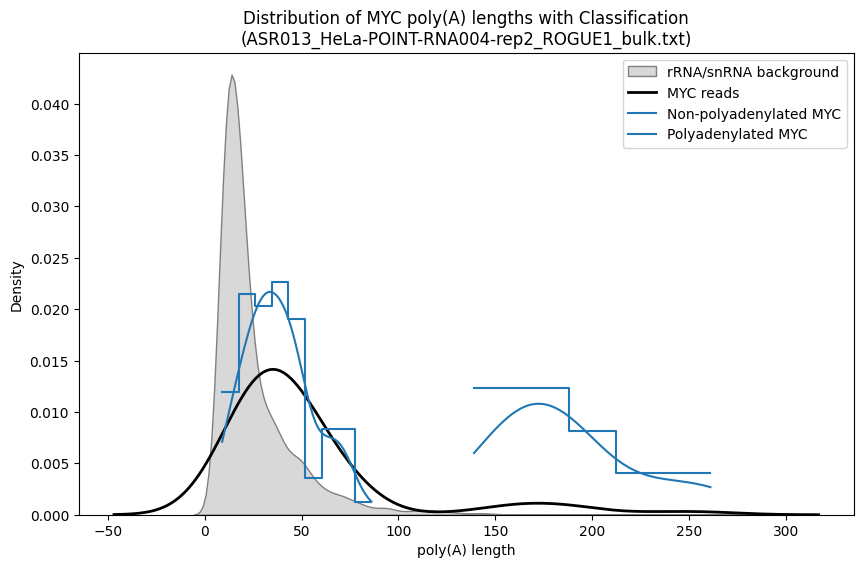

/jobfs/124500891.gadi-pbs/ipykernel_3592931/4117270024.py:18: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)


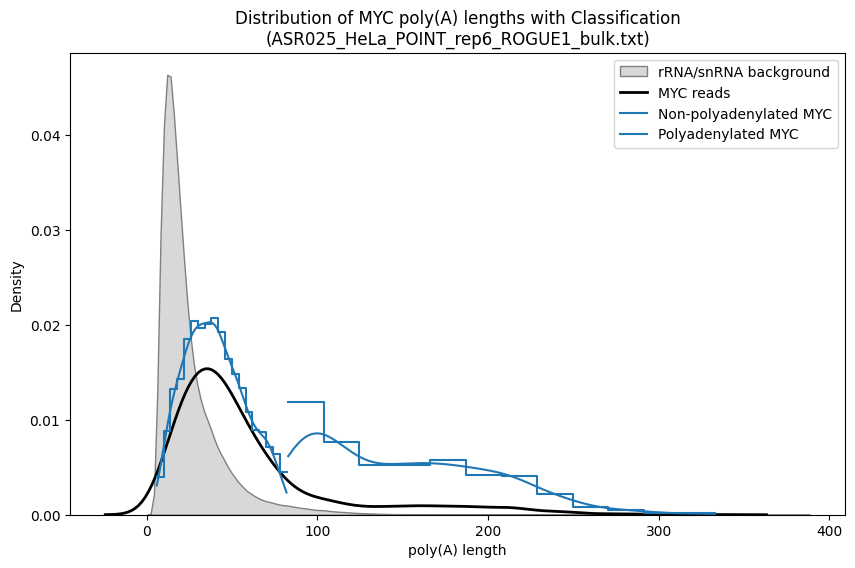

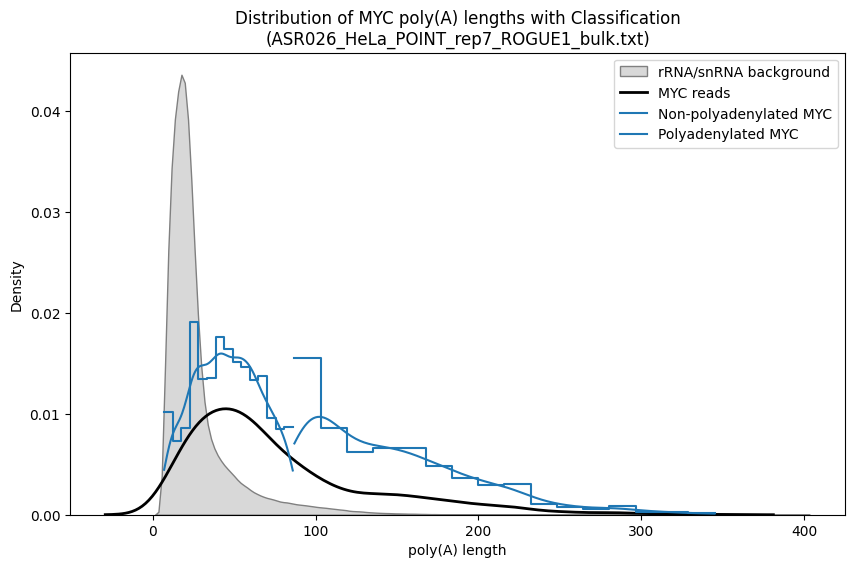

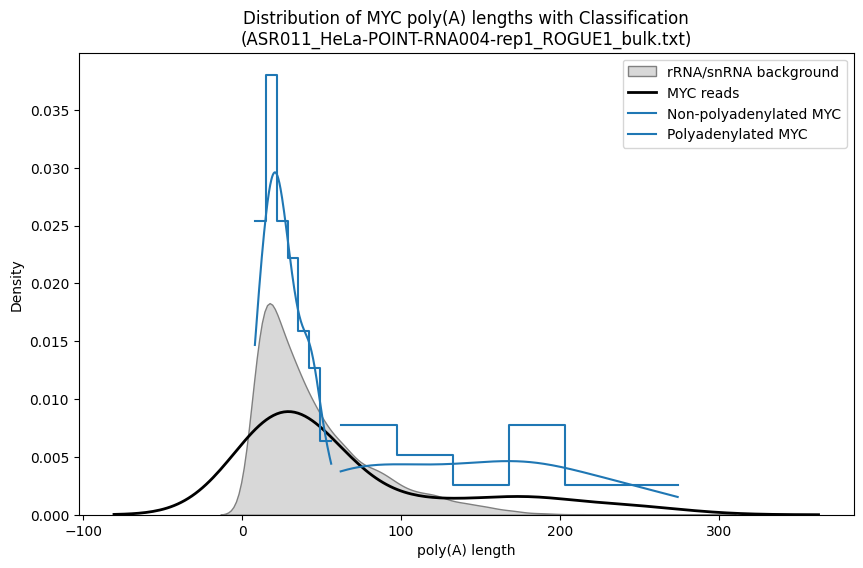

In [9]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Step 1: Define the directory and search for files recursively
base_dir = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/"
file_pattern = "**/*ROGUE1_bulk*.txt"
file_paths = glob.glob(os.path.join(base_dir, file_pattern), recursive=True)

# Function to process each file and generate a plot
def process_file(file_path):
    # Read only the columns of interest
    columns_of_interest = ['gene_id', 'polya_length', 'biotype']
    df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)
    
    # Drop rows with any NaN values
    df = df.dropna(subset=columns_of_interest)
    
    # Filter data for the first Gaussian (snRNA or rRNA)
    null_data = df[(df['biotype'] == 'snRNA') | (df['biotype'] == 'rRNA')]['polya_length']
    
    # Filter data for the second Gaussian (gene_id == ENSG00000136997, MYC gene)
    gene_data = df[df['gene_id'] == 'ENSG00000136997']['polya_length']
    
    # Fit GMM using the null distribution and the gene-specific data
    component_0, component_1, gmm = fit_gmm_with_null(null_data, gene_data)
    
    return component_0, component_1, null_data, gene_data, file_path

# Function to fit GMM
def fit_gmm_with_null(null_values, gene_values, n_components=2):
    # Fit GMM to the null distribution
    null_values = np.array(null_values).reshape(-1, 1)
    null_gmm = GaussianMixture(n_components=1, random_state=0)
    null_gmm.fit(null_values)
    
    # Get the mean and covariance from the null distribution
    null_mean = null_gmm.means_[0][0]
    null_covariance = null_gmm.covariances_[0][0][0]
    
    # Fit GMM to the actual gene values with one component initialized from null distribution
    gene_values = np.array(gene_values).reshape(-1, 1)
    
    gmm = GaussianMixture(n_components=n_components, random_state=0, 
                          means_init=np.array([[null_mean], [np.mean(gene_values)]]), 
                          precisions_init=np.array([[[1 / null_covariance]], [[1 / np.var(gene_values)]]]))

    gmm.fit(gene_values)
    
    # Predict the component each value belongs to
    labels = gmm.predict(gene_values)
    
    # Separate the values into two components based on the labels
    component_0 = gene_values[labels == 0]
    component_1 = gene_values[labels == 1]
    
    return component_0, component_1, gmm

# Plotting function
def plot_classified_distributions(component_0, component_1, null_data, gene_data, file_path, output_dir):
    plt.figure(figsize=(10, 6))
    
    # Plot the background (rRNA/snRNA) as a shaded area
    sns.kdeplot(null_data, color='gray', fill=True, alpha=0.3, label='rRNA/snRNA background')
    
    # Plot the MYC gene data
    sns.kdeplot(gene_data, color='black', lw=2, label='MYC reads')

    # Overlay the classified distributions
    sns.histplot(component_0, color='blue', kde=True, stat='density', label='Non-polyadenylated MYC', element="step", fill=False)
    sns.histplot(component_1, color='red', kde=True, stat='density', label='Polyadenylated MYC', element="step", fill=False)

    plt.title(f'Distribution of MYC poly(A) lengths with Classification\n({os.path.basename(file_path)})')
    plt.xlabel('poly(A) length')
    plt.ylabel('Density')
    plt.legend(loc='upper right')

    # Save the plot
    output_file = os.path.join(output_dir, os.path.basename(file_path).replace('.txt', '_classified.png'))
    plt.savefig(output_file, dpi=300)
    plt.show()

# Step 5: Process all files and generate plots
output_dir = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/classified_plots"
os.makedirs(output_dir, exist_ok=True)

for file_path in file_paths:
    component_0, component_1, null_data, gene_data, file_path = process_file(file_path)
    plot_classified_distributions(component_0, component_1, null_data, gene_data, file_path, output_dir)


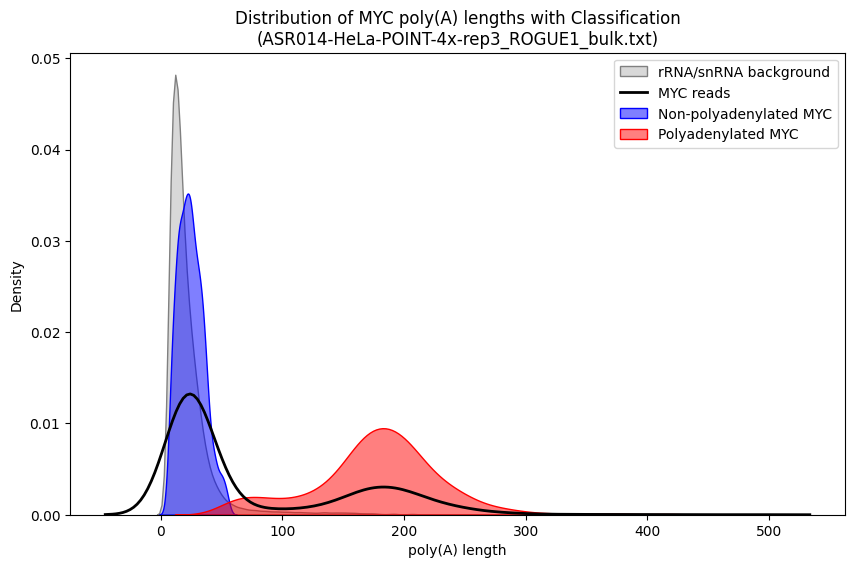

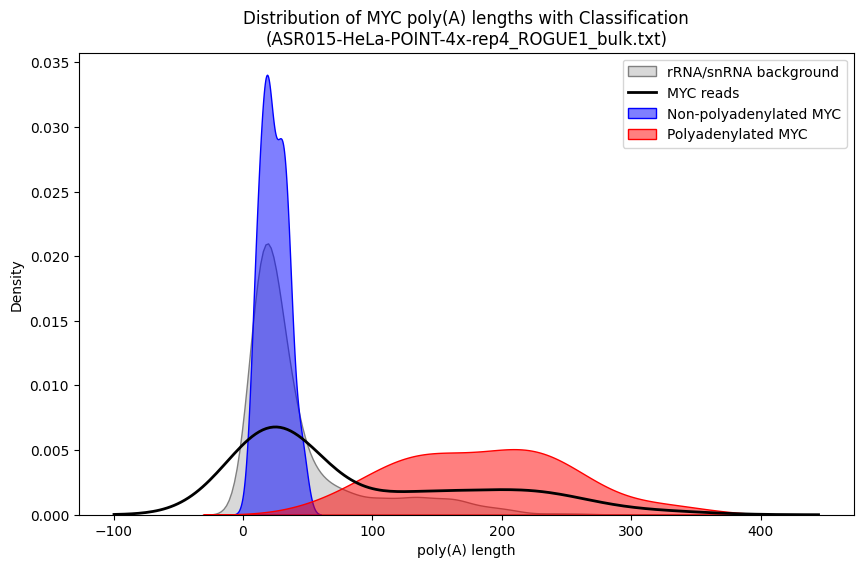

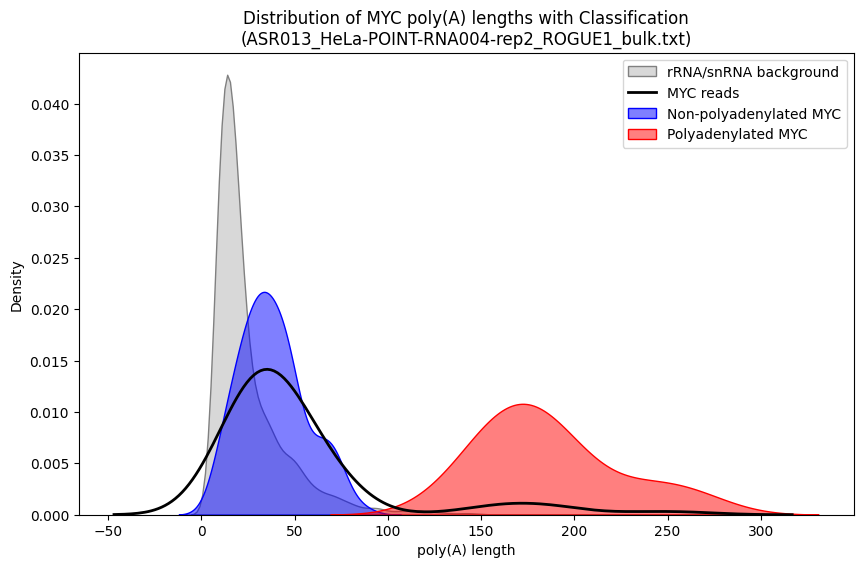

/jobfs/124500891.gadi-pbs/ipykernel_3592931/2653069789.py:18: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)


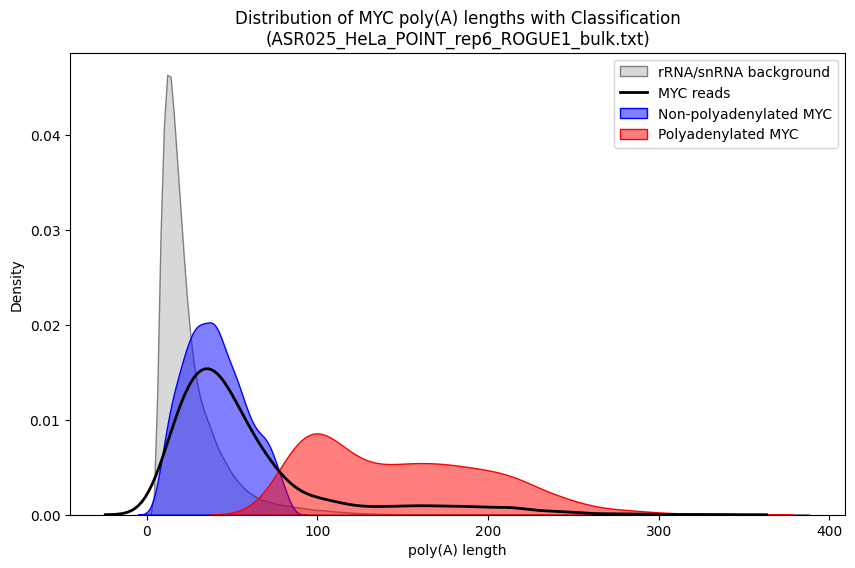

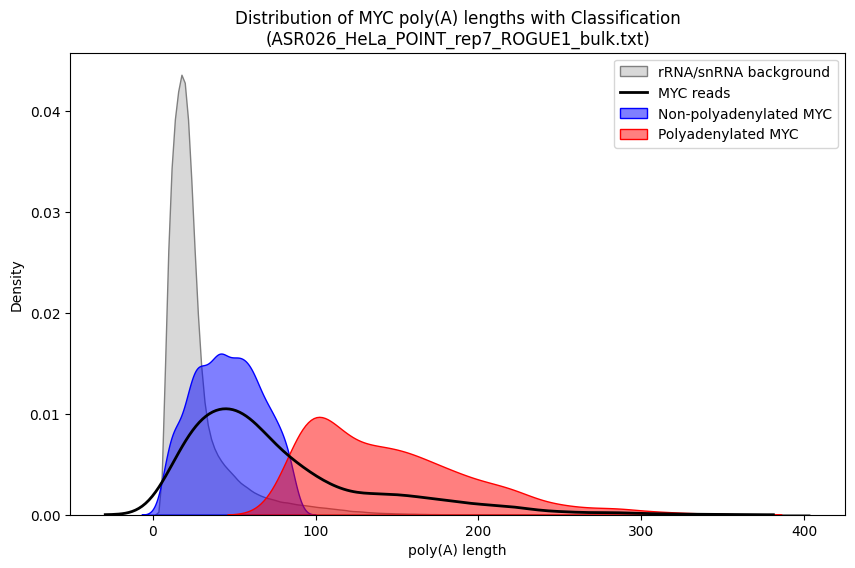

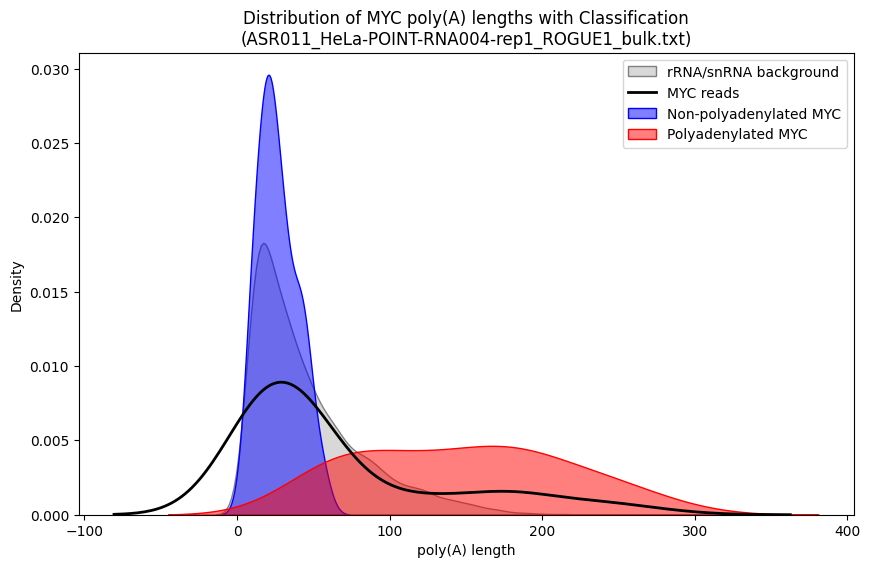

In [10]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Step 1: Define the directory and search for files recursively
base_dir = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/"
file_pattern = "**/*ROGUE1_bulk*.txt"
file_paths = glob.glob(os.path.join(base_dir, file_pattern), recursive=True)

# Function to process each file and generate a plot
def process_file(file_path):
    # Read only the columns of interest
    columns_of_interest = ['gene_id', 'polya_length', 'biotype']
    df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)
    
    # Drop rows with any NaN values
    df = df.dropna(subset=columns_of_interest)
    
    # Filter data for the first Gaussian (snRNA or rRNA)
    null_data = df[(df['biotype'] == 'snRNA') | (df['biotype'] == 'rRNA')]['polya_length']
    
    # Filter data for the second Gaussian (gene_id == ENSG00000136997, MYC gene)
    gene_data = df[df['gene_id'] == 'ENSG00000136997']['polya_length']
    
    # Fit GMM using the null distribution and the gene-specific data
    component_0, component_1, gmm = fit_gmm_with_null(null_data, gene_data)
    
    return component_0, component_1, null_data, gene_data, file_path

# Function to fit GMM
def fit_gmm_with_null(null_values, gene_values, n_components=2):
    # Fit GMM to the null distribution
    null_values = np.array(null_values).reshape(-1, 1)
    null_gmm = GaussianMixture(n_components=1, random_state=0)
    null_gmm.fit(null_values)
    
    # Get the mean and covariance from the null distribution
    null_mean = null_gmm.means_[0][0]
    null_covariance = null_gmm.covariances_[0][0][0]
    
    # Fit GMM to the actual gene values with one component initialized from null distribution
    gene_values = np.array(gene_values).reshape(-1, 1)
    
    gmm = GaussianMixture(n_components=n_components, random_state=0, 
                          means_init=np.array([[null_mean], [np.mean(gene_values)]]), 
                          precisions_init=np.array([[[1 / null_covariance]], [[1 / np.var(gene_values)]]]))

    gmm.fit(gene_values)
    
    # Predict the component each value belongs to
    labels = gmm.predict(gene_values)
    
    # Separate the values into two components based on the labels
    component_0 = gene_values[labels == 0]
    component_1 = gene_values[labels == 1]
    
    return component_0, component_1, gmm

# Plotting function
def plot_classified_distributions(component_0, component_1, null_data, gene_data, file_path, output_dir):
    plt.figure(figsize=(10, 6))
    
    # Plot the background (rRNA/snRNA) as a shaded area
    sns.kdeplot(null_data, color='gray', fill=True, alpha=0.3, label='rRNA/snRNA background')
    
    # Plot the MYC gene data
    sns.kdeplot(gene_data, color='black', lw=2, label='MYC reads')

    # Overlay the classified distributions
    sns.kdeplot(component_0.flatten(), color='blue', fill=True, alpha=0.5, label='Non-polyadenylated MYC')
    sns.kdeplot(component_1.flatten(), color='red', fill=True, alpha=0.5, label='Polyadenylated MYC')

    plt.title(f'Distribution of MYC poly(A) lengths with Classification\n({os.path.basename(file_path)})')
    plt.xlabel('poly(A) length')
    plt.ylabel('Density')
    plt.legend(loc='upper right')

    # Save the plot
    output_file = os.path.join(output_dir, os.path.basename(file_path).replace('.txt', '_classified.png'))
    plt.savefig(output_file, dpi=300)
    plt.show()

# Step 5: Process all files and generate plots
output_dir = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/classified_plots"
os.makedirs(output_dir, exist_ok=True)

for file_path in file_paths:
    component_0, component_1, null_data, gene_data, file_path = process_file(file_path)
    plot_classified_distributions(component_0, component_1, null_data, gene_data, file_path, output_dir)


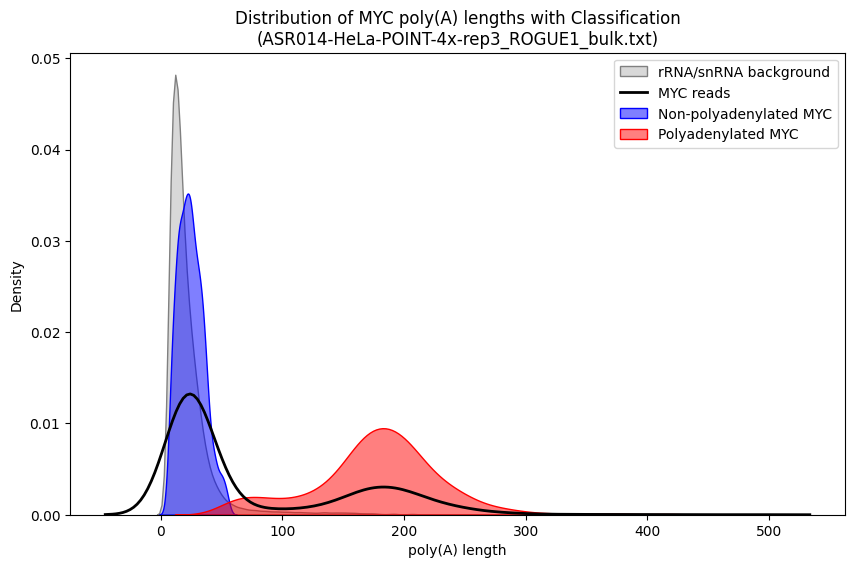

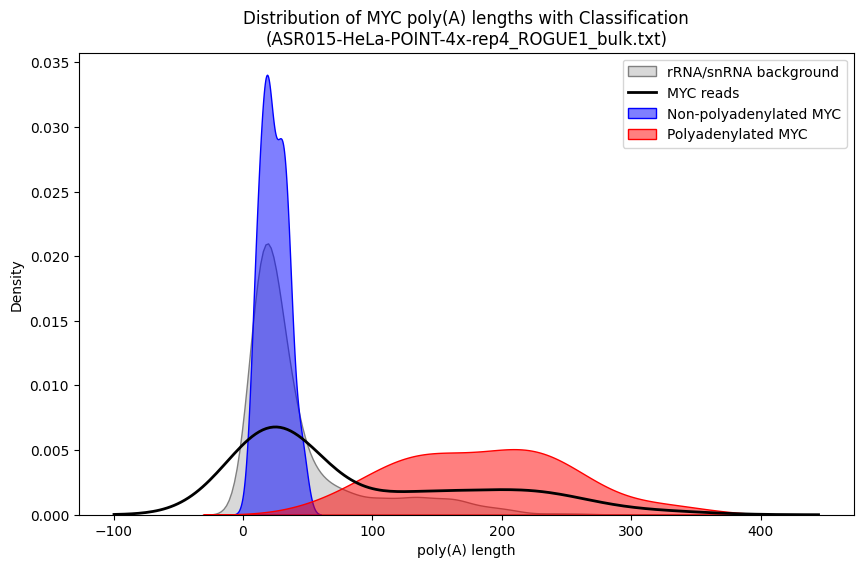

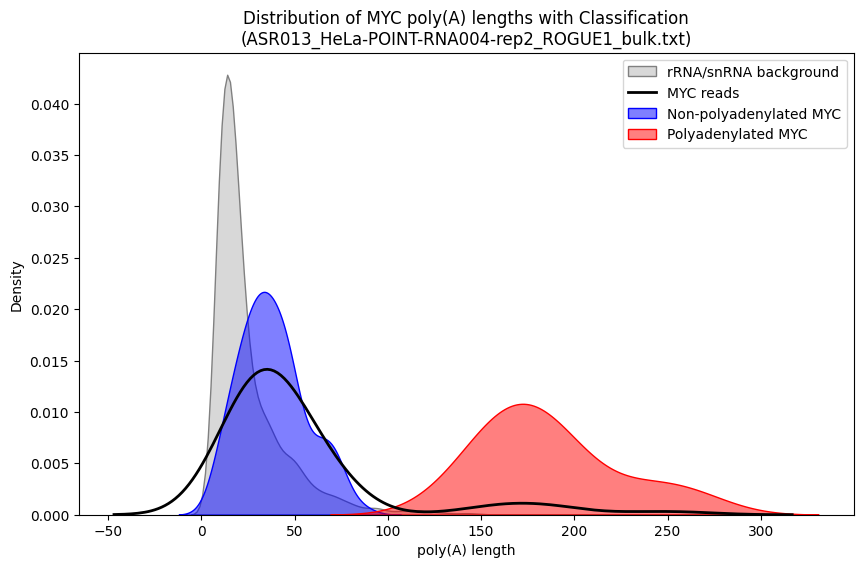

/jobfs/124500891.gadi-pbs/ipykernel_3592931/2958621996.py:63: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)


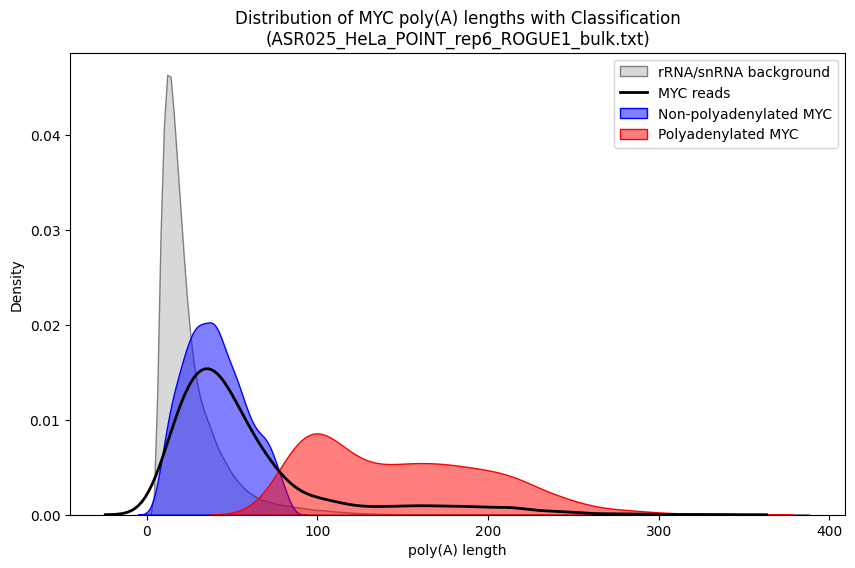

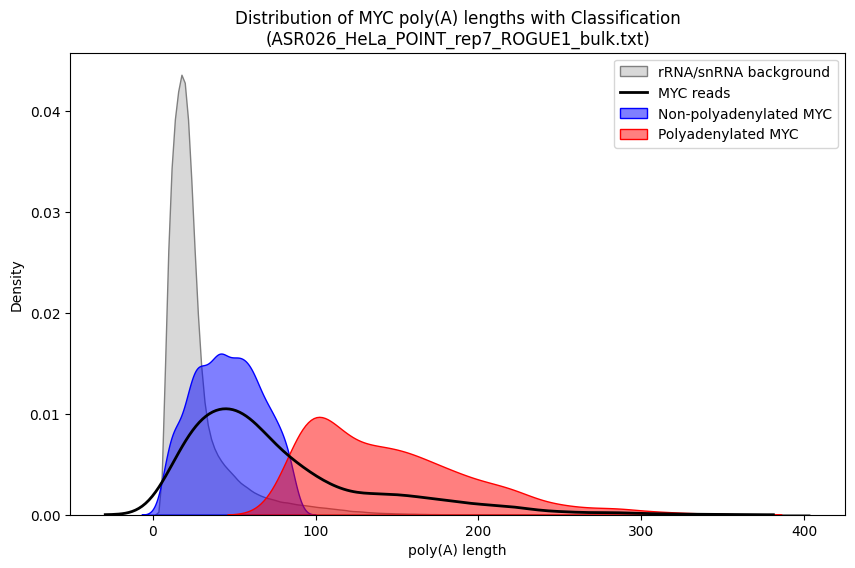

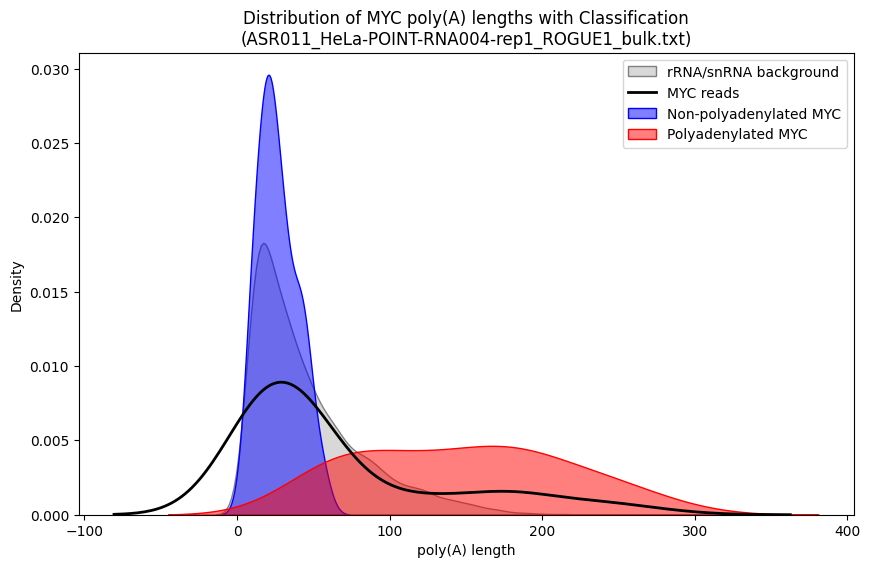

In [11]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Function to fit GMM with a more conservative classification for polyadenylated reads
def fit_gmm_with_null(null_values, gene_values, n_components, threshold):
    """
    Fits a Gaussian Mixture Model (GMM) and classifies reads with a conservative threshold
    to prioritize precision for polyadenylated reads.

    Parameters:
        null_values (array-like): poly(A) lengths from rRNA/snRNA (background).
        gene_values (array-like): poly(A) lengths from the target gene (MYC).
        n_components (int): Number of Gaussian components in the GMM.
        threshold (float): Posterior probability threshold for classifying a read as polyadenylated.

    Returns:
        component_0 (np.ndarray): Non-polyadenylated MYC reads.
        component_1 (np.ndarray): Polyadenylated MYC reads.
        gmm (GaussianMixture): Fitted GMM model.
    """
    # Fit GMM to the null distribution
    null_values = np.array(null_values).reshape(-1, 1)
    null_gmm = GaussianMixture(n_components=1, random_state=0)
    null_gmm.fit(null_values)

    # Get the mean and covariance from the null distribution
    null_mean = null_gmm.means_[0][0]
    null_covariance = null_gmm.covariances_[0][0][0]

    # Fit GMM to the actual gene values with one component initialized from null distribution
    gene_values = np.array(gene_values).reshape(-1, 1)

    gmm = GaussianMixture(
        n_components=n_components,
        random_state=0,
        means_init=np.array([[null_mean], [np.mean(gene_values)]]),
        precisions_init=np.array([[[1 / null_covariance]], [[1 / np.var(gene_values)]]])
    )

    gmm.fit(gene_values)

    # Get the posterior probabilities for each component
    probabilities = gmm.predict_proba(gene_values)

    # Assign labels based on the conservative threshold for the polyadenylated component
    labels = np.where(probabilities[:, 1] > threshold, 1, 0)

    # Separate the values into two components based on the labels
    component_0 = gene_values[labels == 0]
    component_1 = gene_values[labels == 1]

    return component_0, component_1, gmm

# Function to process each file and generate a plot
def process_file(file_path, n_components, threshold):
    # Read only the columns of interest
    columns_of_interest = ['gene_id', 'polya_length', 'biotype']
    df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)
    
    # Drop rows with any NaN values
    df = df.dropna(subset=columns_of_interest)
    
    # Filter data for the first Gaussian (snRNA or rRNA)
    null_data = df[(df['biotype'] == 'snRNA') | (df['biotype'] == 'rRNA')]['polya_length']
    
    # Filter data for the second Gaussian (gene_id == ENSG00000136997, MYC gene)
    gene_data = df[df['gene_id'] == 'ENSG00000136997']['polya_length']
    
    # Fit GMM using the null distribution and the gene-specific data
    component_0, component_1, gmm = fit_gmm_with_null(null_data, gene_data, n_components, threshold)
    
    return component_0, component_1, null_data, gene_data, file_path

# Plotting function
def plot_classified_distributions(component_0, component_1, null_data, gene_data, file_path, output_dir):
    plt.figure(figsize=(10, 6))
    
    # Plot the background (rRNA/snRNA) as a shaded area
    sns.kdeplot(null_data, color='gray', fill=True, alpha=0.3, label='rRNA/snRNA background')
    
    # Plot the MYC gene data
    sns.kdeplot(gene_data, color='black', lw=2, label='MYC reads')

    # Overlay the classified distributions
    sns.kdeplot(component_0.flatten(), color='blue', fill=True, alpha=0.5, label='Non-polyadenylated MYC')
    sns.kdeplot(component_1.flatten(), color='red', fill=True, alpha=0.5, label='Polyadenylated MYC')

    plt.title(f'Distribution of MYC poly(A) lengths with Classification\n({os.path.basename(file_path)})')
    plt.xlabel('poly(A) length')
    plt.ylabel('Density')
    plt.legend(loc='upper right')

    # Save the plot
    output_file = os.path.join(output_dir, os.path.basename(file_path).replace('.txt', '_classified.png'))
    plt.savefig(output_file, dpi=300)
    plt.show()

# Step 5: Process all files and generate plots
output_dir = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/classified_plots"
os.makedirs(output_dir, exist_ok=True)

# Set your desired threshold for classification
conservative_threshold = 0.5
n_components = 2  # Number of Gaussian components

for file_path in file_paths:
    # Process the file using the threshold and n_components
    component_0, component_1, null_data, gene_data, file_path = process_file(file_path, n_components, conservative_threshold)
    plot_classified_distributions(component_0, component_1, null_data, gene_data, file_path, output_dir)


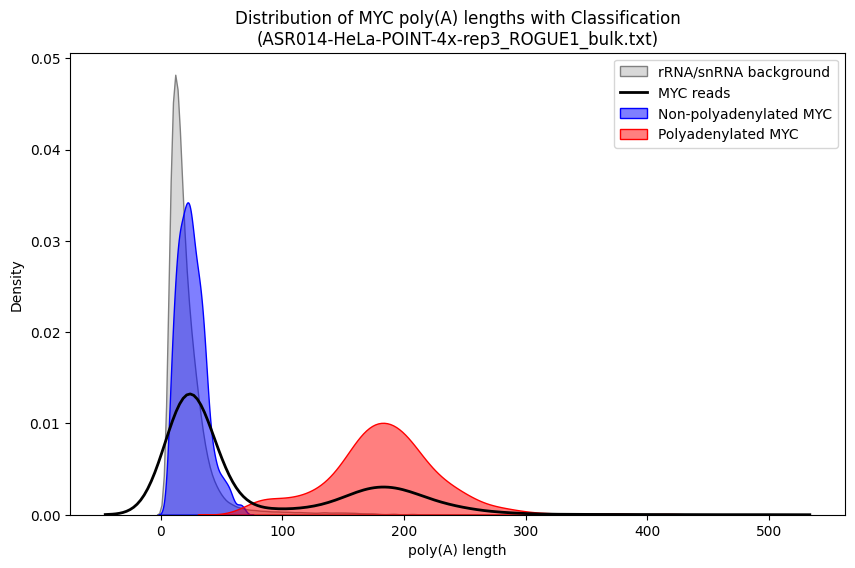

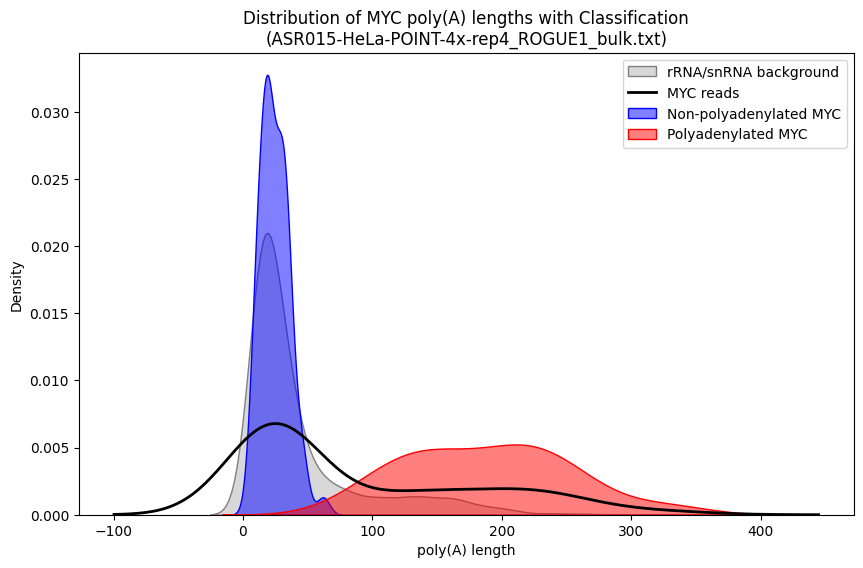

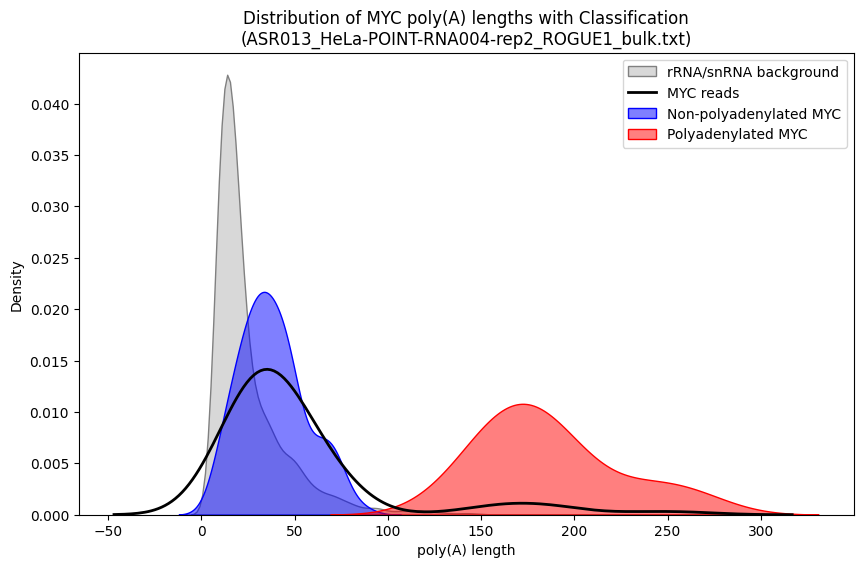

/jobfs/124500891.gadi-pbs/ipykernel_3592931/2431369443.py:63: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)


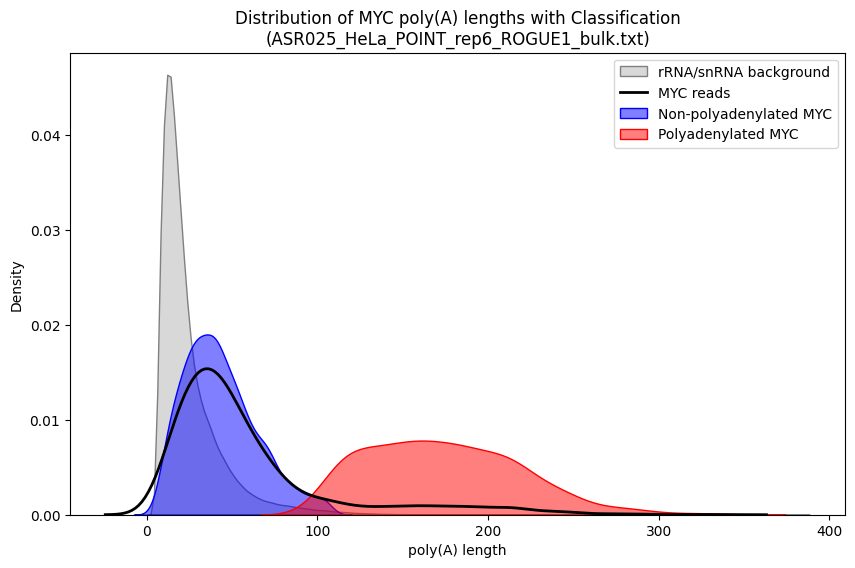

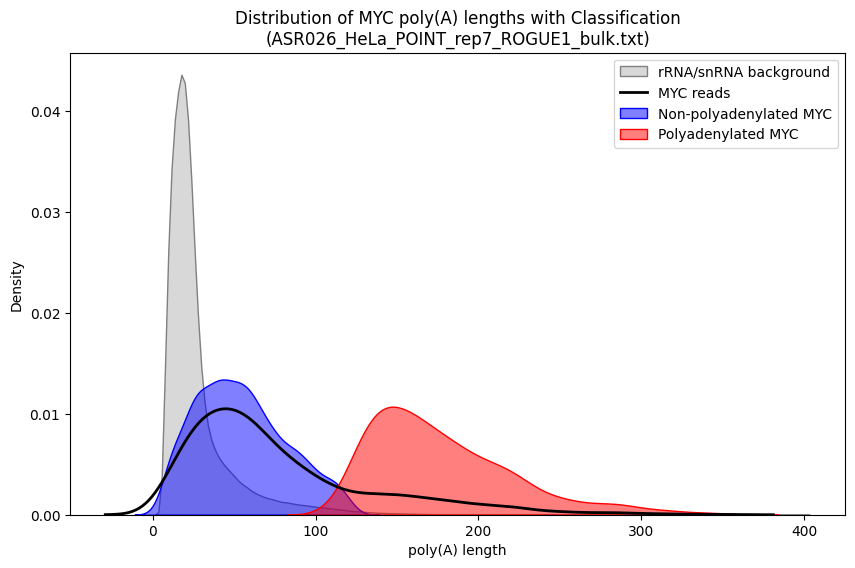

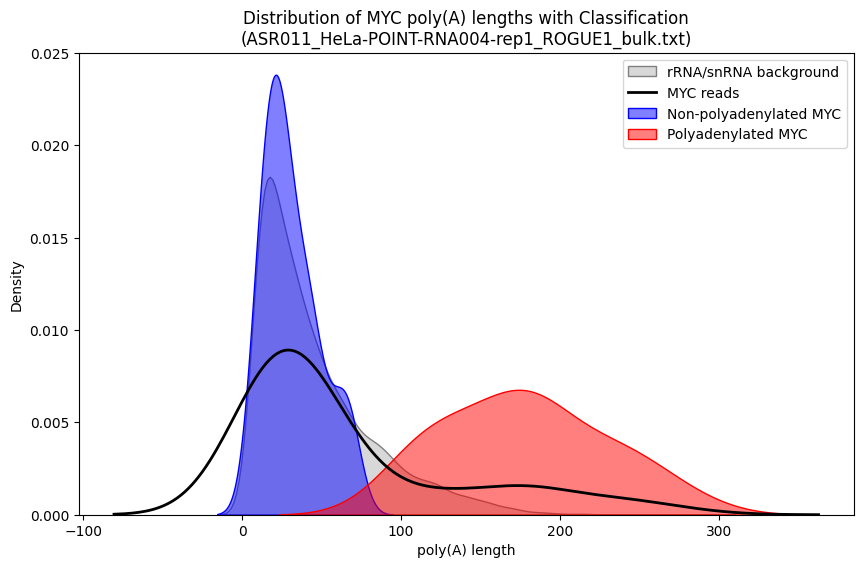

In [12]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Function to fit GMM with a more conservative classification for polyadenylated reads
def fit_gmm_with_null(null_values, gene_values, n_components, threshold):
    """
    Fits a Gaussian Mixture Model (GMM) and classifies reads with a conservative threshold
    to prioritize precision for polyadenylated reads.

    Parameters:
        null_values (array-like): poly(A) lengths from rRNA/snRNA (background).
        gene_values (array-like): poly(A) lengths from the target gene (MYC).
        n_components (int): Number of Gaussian components in the GMM.
        threshold (float): Posterior probability threshold for classifying a read as polyadenylated.

    Returns:
        component_0 (np.ndarray): Non-polyadenylated MYC reads.
        component_1 (np.ndarray): Polyadenylated MYC reads.
        gmm (GaussianMixture): Fitted GMM model.
    """
    # Fit GMM to the null distribution
    null_values = np.array(null_values).reshape(-1, 1)
    null_gmm = GaussianMixture(n_components=1, random_state=0)
    null_gmm.fit(null_values)

    # Get the mean and covariance from the null distribution
    null_mean = null_gmm.means_[0][0]
    null_covariance = null_gmm.covariances_[0][0][0]

    # Fit GMM to the actual gene values with one component initialized from null distribution
    gene_values = np.array(gene_values).reshape(-1, 1)

    gmm = GaussianMixture(
        n_components=n_components,
        random_state=0,
        means_init=np.array([[null_mean], [np.mean(gene_values)]]),
        precisions_init=np.array([[[1 / null_covariance]], [[1 / np.var(gene_values)]]])
    )

    gmm.fit(gene_values)

    # Get the posterior probabilities for each component
    probabilities = gmm.predict_proba(gene_values)

    # Assign labels based on the conservative threshold for the polyadenylated component
    labels = np.where(probabilities[:, 1] > threshold, 1, 0)

    # Separate the values into two components based on the labels
    component_0 = gene_values[labels == 0]
    component_1 = gene_values[labels == 1]

    return component_0, component_1, gmm

# Function to process each file and generate a plot
def process_file(file_path, n_components, threshold):
    # Read only the columns of interest
    columns_of_interest = ['gene_id', 'polya_length', 'biotype']
    df = pd.read_csv(file_path, sep='\t', usecols=columns_of_interest)
    
    # Drop rows with any NaN values
    df = df.dropna(subset=columns_of_interest)
    
    # Filter data for the first Gaussian (snRNA or rRNA)
    null_data = df[(df['biotype'] == 'snRNA') | (df['biotype'] == 'rRNA')]['polya_length']
    
    # Filter data for the second Gaussian (gene_id == ENSG00000136997, MYC gene)
    gene_data = df[df['gene_id'] == 'ENSG00000136997']['polya_length']
    
    # Fit GMM using the null distribution and the gene-specific data
    component_0, component_1, gmm = fit_gmm_with_null(null_data, gene_data, n_components, threshold)
    
    return component_0, component_1, null_data, gene_data, file_path

# Plotting function
def plot_classified_distributions(component_0, component_1, null_data, gene_data, file_path, output_dir):
    plt.figure(figsize=(10, 6))
    
    # Plot the background (rRNA/snRNA) as a shaded area
    sns.kdeplot(null_data, color='gray', fill=True, alpha=0.3, label='rRNA/snRNA background')
    
    # Plot the MYC gene data
    sns.kdeplot(gene_data, color='black', lw=2, label='MYC reads')

    # Overlay the classified distributions
    sns.kdeplot(component_0.flatten(), color='blue', fill=True, alpha=0.5, label='Non-polyadenylated MYC')
    sns.kdeplot(component_1.flatten(), color='red', fill=True, alpha=0.5, label='Polyadenylated MYC')

    plt.title(f'Distribution of MYC poly(A) lengths with Classification\n({os.path.basename(file_path)})')
    plt.xlabel('poly(A) length')
    plt.ylabel('Density')
    plt.legend(loc='upper right')

    # Save the plot
    output_file = os.path.join(output_dir, os.path.basename(file_path).replace('.txt', '_classified.png'))
    plt.savefig(output_file, dpi=300)
    plt.show()

# Step 5: Process all files and generate plots
output_dir = "/g/data/qq78/as7425/rna_biogenesis_maps/dFORCE_nextflow_HeLa_aug2024/classified_plots"
os.makedirs(output_dir, exist_ok=True)

# Set your desired threshold for classification
conservative_threshold = 0.99
n_components = 2  # Number of Gaussian components

for file_path in file_paths:
    # Process the file using the threshold and n_components
    component_0, component_1, null_data, gene_data, file_path = process_file(file_path, n_components, conservative_threshold)
    plot_classified_distributions(component_0, component_1, null_data, gene_data, file_path, output_dir)
